# Lecture 4 - Data wrangling

Of all the advantages of modern computers the most dominant, awful activity is cleaning data. More than any other task, the job of finding and correcting data errors and putting the data into a machine-usable format dominates the daily lives of [Data Scientists](https://en.wikipedia.org/wiki/Data_science) who are pushing computers into all areas of the modern world. Is is estiamted that up to [80% of their time is spent data wrangling](https://www.nytimes.com/2014/08/18/technology/for-big-data-scientists-hurdle-to-insights-is-janitor-work.html), which makes the job far less sexy than it might first seem...




The art of data wrangling lies in doing the most to get data in shape using the fewest possible lines. Anything that can be automated, due to **proper naming and data-storage convetions**, is the best, as you'll be able to do it again, over and over, with little extra effort. To do this effectively, let's look at a few of R's built in data types so we know what we're working with to start. 

# What's your [vector](https://www.youtube.com/watch?v=fVq4_HhBK8Y)?

<img src="airplane.jpg" alt="airplane" width="500"/>

The sandard, basic building block of R is the vector or array - a data structure consisting of a collection of elements identified by their relative positions. Pretty much everything is a vector of some sort. Even a single value is a vector, having a single index position:

In [1]:
x = 2

In [2]:
is.vector(x)

[1] TRUE

In [3]:
x[1]

[1] 2

In [4]:
x[2]

[1] NA

Those indexes can also be used on the fly, to change the dimension of an existing vector:

In [5]:
x[10] = 3

In [6]:
x

[1]  2 NA NA NA NA NA NA NA NA  3

This vectorized behaviour is, unbenownst to most of us, awesome, because it makes some assumptions under the hood that are not immediately obvious. For example if we make a new object:

In [7]:
y = x**2
y

[1]  4 NA NA NA NA NA NA NA NA  9

R knows that we want to square each element of `x` to create the new object `y`. While this may not seem remarkable, try to think of how you would have to do it if R couldn't handle a vectorized input:

---
# Task 1
---

Create `y = x**2` one element at a time, where `x = c(2, 5, 7, 10)`. Code from Lecture 2 might be helpful here.

In [ ]:
# Your answer here


---

A very important 'feature' of R, is that it recycles vectors - often without telling you - making it critical that you check the dimensions of things before and after you manipulate them. For example:

In [14]:
x = 1:3
z = 4:9
length(x)

[1] 3

In [15]:
length(z)

[1] 6

In [16]:
x*z

[1]  4 10 18  7 16 27

Which, once it messes up your *really important data* a few times, will give you reflexive twitches to check and check again that you're doing what you think you are. 

## c()

R's workhorse vector object is the catenate function `c()`, the name of which means ["*To connect things together, especially to form a chain*"](https://en.wiktionary.org/wiki/catenate). What's really important about these objects is that they are by default **all of the same type**. So numbers go with numbers, and strings go with strings etc. Once again, R makes some default decisions about assigning classes to objects within these *atomic vectors*:

In [17]:
x = c('This','is','intense','eh','?', 42)

In [18]:
class(x)

[1] "character"

In [19]:
x

[1] "This"    "is"      "intense" "eh"      "?"       "42"

### list()

Unlike atomic vectors such as `c()`, `list()` objects can hold any type of data, as a mixture. This increased flexability comes at the cost of decreased utility, with fewer automagic things built in and generally slower performance.

One key feature is that list objects can also have names:

In [21]:
x = list(3,45,'nutz')

In [25]:
x[3]

[[1]]
[1] "nutz"

In [26]:
x = list('one'=3, 'two'=45, 'three'='nutz')

In [27]:
x

$one
[1] 3

$two
[1] 45

$three
[1] "nutz"

In [28]:
names(x)

[1] "one"   "two"   "three"

In [29]:
x$two

[1] 45

In [30]:
x[2]

$two
[1] 45

Many programming languages have this kind of behaviour, but in R the important reason to know about lists is that they are the buliding blocks for many kinds of objects, including `data.frame()` and other package function outputs. This is why you can use the `$` to access the columns in `data.frame()`.

List indexing is also a bit different, in that it uses double-square brackets `[[]]` to do the indexing, often as a nested object.

In [31]:
x = list('this'=c(1,4,6,7:20), 'is'=TRUE, 'some'=2:7, 'list'=c(4,3,5.44))

In [33]:
x$this

[1]  1  4  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20

In [36]:
x[]

$this
 [1]  1  4  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20

$is
[1] TRUE

$some
[1] 2 3 4 5 6 7

$list
[1] 4.00 3.00 5.44

In [37]:
class(x)

[1] "list"

This kind of list creation is how data frames are made explicitly - except that they need to have the same length of items for each row, except where a single value gets recycled to the full column. And keep in mind, data frame columns are atomic vectors (have the same type).

---
# Task 2
---

Using `data.frame()` instead of `list()`, create a data frame object that holds something interesting

In [ ]:
# Your answer here


## Converting vector types

Among all the things to give one fits about R it is the behaviour of *atomic vectors* - those vector types that specify inherent properties useful for getting things done can also cause super-annoying problems, particuarly when they are assumed to be `factors()`. 

Let's start with a numeric vector:

In [38]:
x = 22:7

In [39]:
x

[1] 22 21 20 19 18 17 16 15 14 13 12 11 10  9  8  7

In [40]:
class(x)

[1] "integer"

In [41]:
x = x/2.3

In [42]:
x

[1] 9.565217 9.130435 8.695652 8.260870 7.826087 7.391304 6.956522 6.521739
 [9] 6.086957 5.652174 5.217391 4.782609 4.347826 3.913043 3.478261 3.043478

In [43]:
class(x)

[1] "numeric"

In [44]:
x = as.character(x)

In [48]:
x

[1] "9.56521739130435" "9.1304347826087"  "8.69565217391304" "8.26086956521739"
 [5] "7.82608695652174" "7.39130434782609" "6.95652173913044" "6.52173913043478"
 [9] "6.08695652173913" "5.65217391304348" "5.21739130434783" "4.78260869565217"
[13] "4.34782608695652" "3.91304347826087" "3.47826086956522" "3.04347826086957"

In [49]:
class(x)

[1] "character"

In [50]:
x = as.factor(x)

In [51]:
x

[1] 9.56521739130435 9.1304347826087  8.69565217391304 8.26086956521739
 [5] 7.82608695652174 7.39130434782609 6.95652173913044 6.52173913043478
 [9] 6.08695652173913 5.65217391304348 5.21739130434783 4.78260869565217
[13] 4.34782608695652 3.91304347826087 3.47826086956522 3.04347826086957
16 Levels: 3.04347826086957 3.47826086956522 ... 9.56521739130435

Now looking at the array above, what's not clear? Seems like a numeric vector by all appearences. Ah but if it were thus...

In [52]:
x*10

Warning message in Ops.factor(x, 10):
“‘*’ not meaningful for factors”

[1] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA

In [53]:
class(x)

[1] "factor"

Ah ok, well let's just convert it to a numeric vector eh?

In [54]:
as.numeric(x)

[1] 16 15 14 13 12 11 10  9  8  7  6  5  4  3  2  1

Wha?

What are these factors? Well factors in R are really categorical variables that store a set of integer values for each unique instance of the factor and a character value that is used when the factor is displayed. This is really useful for statistical models and some other plotting functions, but leads to unexpected behaviour more than one would like.

So looking at a new array of nubmers with some duplicate values:

In [55]:
x = factor(c(2,33,4,33,5,66,5,7,33,4,2))
x

[1] 2  33 4  33 5  66 5  7  33 4  2 
Levels: 2 4 5 7 33 66

In [56]:
as.numeric(x)

[1] 1 5 2 5 3 6 3 4 5 2 1

In [57]:
levels(x)

[1] "2"  "4"  "5"  "7"  "33" "66"

So `levels()` returns the unique levels, and `as.numeric()` returns the index positions into `levels()`. So

---
# Task 3
---

Using `levels()` and `as.numeric()` return the original numeric vector for x using positional indexing.

In [65]:
# Your answer here


It may occasionally be important to specify the order of factors, in which case this can be specified explicitly:

In [68]:
x = factor(c("small", "large", "large", "small", "medium"), levels = c("medium","small",  "large"))
x

[1] small  large  large  small  medium
Levels: medium small large

In [69]:
levels(x)

[1] "medium" "small"  "large"

## Tables

People that love Excel loves them some [pivot tables](https://exceljet.net/things-to-know-about-excel-pivot-tables) - but dang they are awful (and unreproducible). Yet getting summary tables in an informative format is not unique to Excel. Any object-oriented programming language worth its salt will have some form of table function. 

In R, the table function does this work, typically using categorical factors to get the work done. Let's start by making a data frame:

In [1]:
# Make fake clinical trial data
set.seed(1234)
study_results = data.frame(subject = 1:100,
               age = round(runif(100, 18, 65),0),
               treatment = gl(2, 50, labels = c("Treatment", "Control")),
               trial = sample(paste("Trial", LETTERS[1:5]), 100, replace = TRUE))

In [2]:
round(runif(100, 18, 65),0)

[1] 49 43 33 54 43 52 32 37 28 64 45 31 27 54 45 62 48 51 41 58 38 19 30 34 24
 [26] 41 56 34 42 41 55 45 23 56 45 28 53 32 41 65 38 29 28 50 64 40 54 45 63 55
 [51] 43 46 30 31 21 44 30 18 46 42 58 19 46 31 24 23 53 19 20 53 35 54 36 56 19
 [76] 42 57 44 31 34 35 38 61 55 53 31 39 32 51 57 49 37 63 29 47 54 51 23 48 33

In [3]:
head(study_results)

subject,age,treatment,trial
1,23,Treatment,Trial A
2,47,Treatment,Trial C
3,47,Treatment,Trial B
4,47,Treatment,Trial B
5,58,Treatment,Trial A
6,48,Treatment,Trial B


The first and simplest thing we can table is to get counts of something, say like the number of people in each trial:

In [101]:
table(study_results$trial)


Trial A Trial B Trial C Trial D Trial E 
     16      19      23      18      24 

More interesting might be to see how well distributed the treatments and controls were per trial:

In [102]:
table(study_results$trial,study_results$treatment=='Treatment')

         
          FALSE TRUE
  Trial A     7    9
  Trial B     9   10
  Trial C    11   12
  Trial D    11    7
  Trial E    12   12

R also has an `xtab` (cross-tabular) function that gives you other kinds of summaries - by default the sum - for say, of all the ages in the study:

In [104]:
?xtabs

In [5]:
sort(xtabs(age~treatment,study_results))

treatment
  Control Treatment 
     1853      2000 

---
# Task 4
---

Import the MLB pitching data and figure out how many total saves (`SV`) each team had in 2017, retuning them in order.

In [ ]:
# Your answer here


## Value matching

Among the more useful things to do with a computer is compare matching elements of two different lists - in a stroke of serendipity this is remarkably tedious for people to do and remarkably easy for a computer. R has two distinct ways to do matching `%in%` and `match()`.

## `%in%`

The somewhat oddly written `%in%` function really just asks a simple question: is the first thing %within% the second. So with a simple list of numbers:

In [109]:
longarray = 1:10
shortarray = c(1,3,5,9)

In [110]:
longarray

[1]  1  2  3  4  5  6  7  8  9 10

In [111]:
shortarray

[1] 1 3 5 9

In [112]:
longarray %in% shortarray

[1]  TRUE FALSE  TRUE FALSE  TRUE FALSE FALSE FALSE  TRUE FALSE

In [114]:
longarray[longarray %in% shortarray]

[1] 1 3 5 9

In [113]:
shortarray %in% longarray

[1] TRUE TRUE TRUE TRUE

Look carefully here at what is being compared, simply is each member of the left hand item also a member of the right hand item. It doesn't matter their order, but the left hand item is the length of what gets returned, because that's what is being checked.

This kind of matching can also usefully apply to strings:

In [115]:
# Example from help('%in%')
sstr = c("c","ab","B","bba","c",NA,"@","bla","a","Ba","%")
sstr

[1] "c"   "ab"  "B"   "bba" "c"   NA    "@"   "bla" "a"   "Ba"  "%"

In [116]:
# Bulit-in letters
letters
LETTERS

[1] "a" "b" "c" "d" "e" "f" "g" "h" "i" "j" "k" "l" "m" "n" "o" "p" "q" "r" "s"
[20] "t" "u" "v" "w" "x" "y" "z"

[1] "A" "B" "C" "D" "E" "F" "G" "H" "I" "J" "K" "L" "M" "N" "O" "P" "Q" "R" "S"
[20] "T" "U" "V" "W" "X" "Y" "Z"

In [117]:
sstr[sstr %in% c(letters, LETTERS)]

[1] "c" "B" "c" "a"

What comes back here, through some clever use of positional indexing, are the values of `sstr` that are letters (or LETTERS).

## `match()`

One of R's more useful functions for indexing one vector based on another is `match()`, which takes items in one list and finds their **index position** in another. 

Remember our perfect-batting 2017 baseball pitchers from two weeks ago? 

In [118]:
mlb_batting = na.omit(read.csv("mlb2017_batting.txt"))
mlb_batting[mlb_batting$BA==1 & mlb_batting$G>10, ]

,Rk,Name,Age,Tm,Lg,G,PA,AB,R,H,⋯,SLG,OPS,OPS.,TB,GDP,HBP,SH,SF,IBB,Pos.Summary
641,641,Raisel Iglesias\iglesra01,27,CIN,NL,60,1,1,0,1,⋯,2,3,657,2,0,0,0,0,0,1
1321,1321,Jose Torres*\torrejo02,23,SDP,NL,57,1,1,1,1,⋯,1,2,439,1,0,0,0,0,0,1


Well let's figure out if they are actually closers, used in the last inning to shut down the other team. To do this, we'll need to import the pitching data from [Baseball-Reference.com](https://www.baseball-reference.com/leagues/MLB/2017-standard-pitching.shtml):

In [119]:
# Create new dataframe from baseball data
mlb_pitching = na.omit(read.csv("mlb2017_pitching.txt"))

In [120]:
names(mlb_pitching)

[1] "Rk"   "Name" "Age"  "Tm"   "Lg"   "W"    "L"    "W.L." "ERA"  "G"   
[11] "GS"   "GF"   "CG"   "SHO"  "SV"   "IP"   "H"    "R"    "ER"   "HR"  
[21] "BB"   "IBB"  "SO"   "HBP"  "BK"   "WP"   "BF"   "ERA." "FIP"  "WHIP"
[31] "H9"   "HR9"  "BB9"  "SO9"  "SO.W"

The columns for pitching are different than for batting:

- **Rk** -- Rank; This is a count of the rows from top to bottom. It is recalculated following the sorting of a column.
- **Name** -- Player Name; Bold can mean player is active for this team or player has appeared in MLB; * means LHP or LHB, # means switch hitter,+ can mean HOFer
- **Age** -- Player’s age at midnight of June 30th of that year
- **Lg** -- League; AL - American League (1901-present); NL - National League (1876-present); AA - American Association (1882-1891); UA - Union Association (1884); PL - Players League (1890); FL - Federal League (1914-1915); NA - National Association (1871-1875)

- **W** -- Wins
- **L** -- Losses
- **W-L%** -- Win-Loss Percentage
W / (W + L)
For players, leaders need one decision for every ten team games.
For managers, minimum to qualify for leading is 320 games.
- **ERA** -- 9 * ER / IP
For recent years, leaders need 1 IP
per team game played.
Bold indicates lowest ERA using current stats
Gold means awarded ERA title at end of year.
- **G** -- Games Played or Pitched
- **GS** -- Games Started
- **GF** -- Games Finished
- **CG** -- Complete Game
- **SHO** -- Shutouts
No runs allowed and a complete game.
- **SV** -- Saves
- **IP** -- Innings Pitched
- **H** -- Hits/Hits Allowed
- **R** -- Runs Scored/Allowed
- **ER** -- Earned Runs Allowed
- **HR** -- Home Runs Hit/Allowed
- **BB** -- Bases on Balls/Walks
- **IBB** -- Intentional Bases on Balls
First tracked in 1955.
- **SO** -- Strikeouts
- **HBP** -- Times Hit by a Pitch.
- **BK** -- Balks
- **WP** -- Wild Pitches
- **BF** -- Batters Faced
- **ERA+** -- ERA+
100*[lgERA/ERA]
Adjusted to the player’s ballpark(s).
- **FIP** -- Fielding Independent Pitching
this stat measures a pitcher's effectiveness at preventing HR, BB, HBP and causing SO
(13*HR + 3*(BB+HBP) - 2*SO)/IP + Constantlg
The constant is set so that each season MLB average FIP is the same as the MLB avg ERA
- **WHIP** -- (BB + H)/IP
For recent years, leaders need 1 IP
per team game played
- **H9** -- 9 x H / IP
For recent years, leaders need 1 IP
per team game played
- **HR9** -- 9 x HR / IP
For recent years, leaders need 1 IP
per team game played
- **BB9** -- 9 x BB / IP
For recent years, leaders need 1 IP
per team game played
- **SO9** -- 9 x SO / IP
For recent years, leaders need 1 IP
per team game played
- **SO/W** -- SO/W or SO/BB
For recent years, pitching leaders need 1 IP
per team game played.
No batting leaders computed.

How do we figure out if these pitchers are closers? Reading the [Wikipedia Closer page](https://en.wikipedia.org/wiki/Closer_(baseball)) we can see that the main statistic that ranks closers is [saves](https://en.wikipedia.org/wiki/Save_(baseball)) (`SV`) - being is the finishing pitcher in a game won by his team and entered the game when they were ahead. 

So looking at saves:

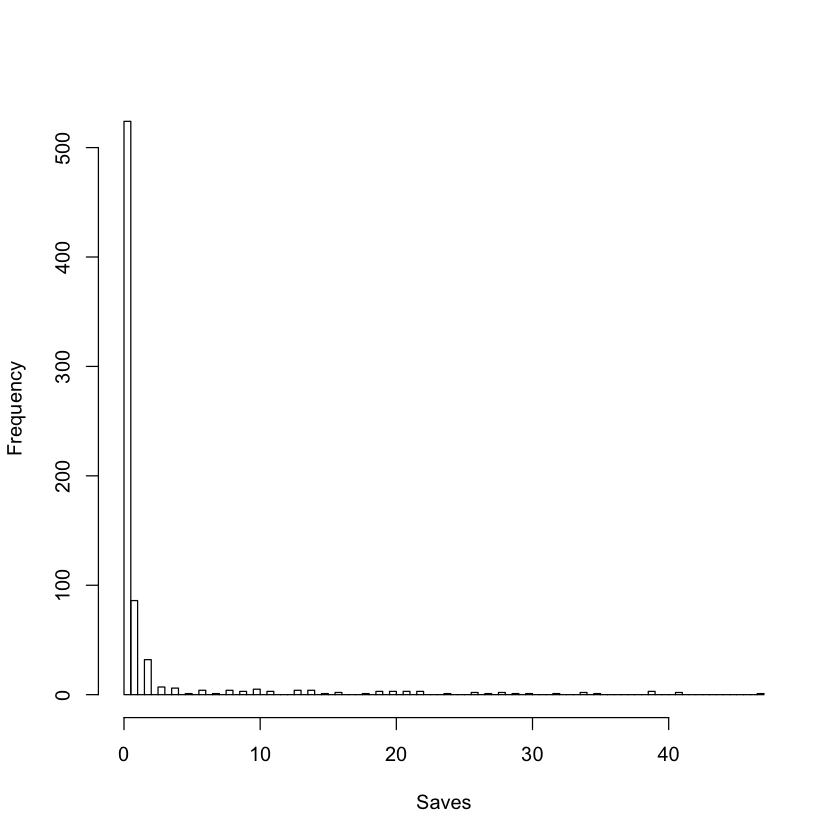

In [121]:
hist(mlb_pitching$SV,breaks=100, xlab='Saves', main='')

We can see there are a lot of zeros and ones - likely starting pitchers - so looking at just those with more than 3 saves:

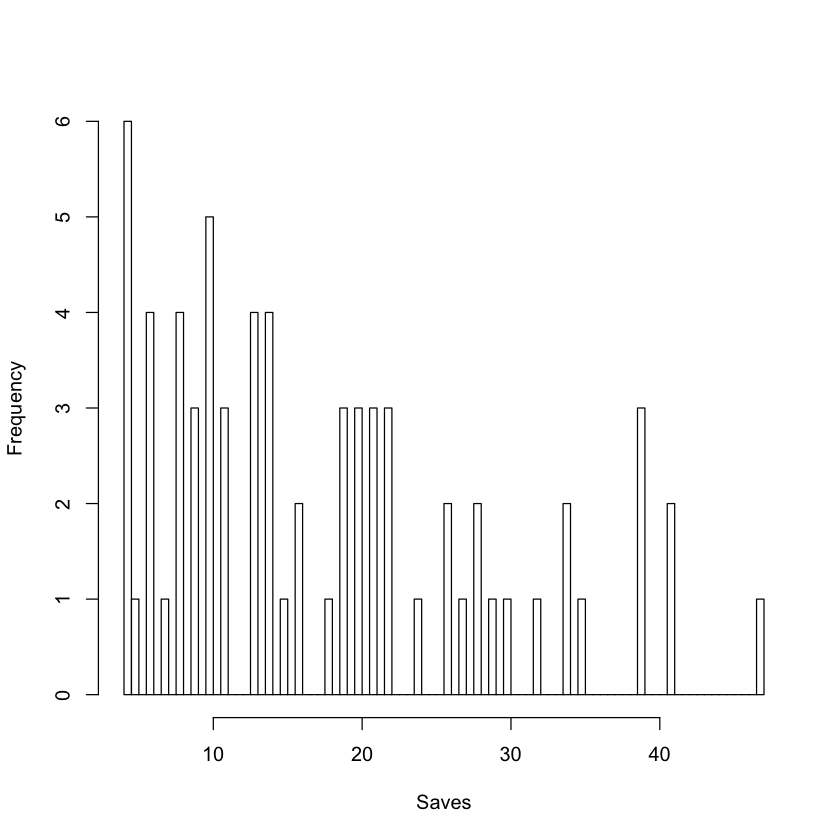

In [122]:
hist(mlb_pitching$SV[mlb_pitching$SV>3],breaks=100, xlab='Saves', main='')

We're likely looking at relievers or closers. The key thing we need to link the batting and pitching tables is the `name` column - we need to extract the names of interest from the batting column and use them to extract the number of saves for these two players.

There are a few different ways one could do this in R, but a good one is the `match()` function, which finds the index locations of one list within another:

In [123]:
# Possible closers from batting data
Pclosers = mlb_batting$Name[mlb_batting$BA==1&mlb_batting$G>10]
Pclosers

[1] Raisel Iglesias\\iglesra01 Jose Torres*\\torrejo02   
1230 Levels: A.J. Cole\\coleaj01 ... Zack Wheeler*\\wheelza01

In [124]:
# Index pitching data for these players
indx = match(Pclosers, mlb_pitching$Name)
indx

[1] 311 645

Take a second to look at this - we match the datasets in a specific direction, getting the index positions within the second match function argument, for the players corresponding to the first match function argument. Order here is important and you need to remember (or trial and error) which is which.

In [125]:
# Index the pitching data
mlb_pitching[indx,1:20]

,Rk,Name,Age,Tm,Lg,W,L,W.L.,ERA,G,GS,GF,CG,SHO,SV,IP,H,R,ER,HR
395,395,Raisel Iglesias\iglesra01,27,CIN,NL,3,3,0.500,2.49,63,0,57,0,0,28,76.0,57,22,21,5
828,828,Jose Torres*\torrejo02,23,SDP,NL,7,4,0.636,4.21,62,0,16,0,0,1,68.1,63,34,32,13


From this we can see that with 28 saves one player (Raisel Iglesias) appears to be a closer - however with one save the other player clearly isn't (`SV=1`). Who the heck is Jose Torres? It looks like he was used as a short-relief pitcher - used in 68 innings but only allowed to come to bat once during his entire career. (Don't feel bad for him, as it turns out he's [not a nice guy](http://www.sandiegouniontribune.com/sports/sd-sp-padres-jose-torres-padres-arrest-0214-story.html).)

---
# Task 5
---

Use your index and matching skills to find oldest MLB pitcher to hit above 0.250 in 2017.

In [ ]:
# Your answer here


*Several parts of today were cribbed from [Jenny Bryan](http://stat545.com/block004_basic-r-objects.html).

# What have you learned and what's next?

The point of today's lab was to learn a few key aspects of R objects so we can wrangle them

**You should at this point be comfortable:**
 1. Knowing about various vector types
 2. Understanding that not all R vectors act the same
 3. Handling factors
 4. Tables
 5. Value matching

Next week we will delve into database-style operations, life-saving for reproducible, error-free research that will speed up many data wrangling operations.

---
# Assignment 1 - Excel from Hell - 'the revenge'
